In [1]:
import numpy as np
import scipy.stats as stt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nibabel as nib
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
from __future__ import annotations
from nilearn.image import new_img_like
import pandas as pd
import nibabel as nib
import seaborn as sns
from nilearn import plotting
from rsatoolbox.inference import eval_fixed
from rsatoolbox.model import ModelFixed
from rsatoolbox.rdm import RDMs
from glob import glob
from rsatoolbox.util.searchlight import get_volume_searchlight, get_searchlight_RDMs, evaluate_models_searchlight
import matplotlib
import masking as mask
import nilearn as nil
from rsatoolbox.rdm import compare
from nilearn.masking import _apply_mask_fmri
import rsatoolbox
from nilearn.plotting import plot_roi
from nilearn.masking import compute_epi_mask
from nilearn.masking import apply_mask
from scipy import signal
import rsatoolbox.data as rsad
from rsatoolbox.rdm import get_categorical_rdm
from rsatoolbox import vis 
import os

C:\Users\saado\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
data_folder = r'D:\shabnam\rsatoolbox-develop\percy'
image_paths = list(glob(f"{data_folder}/*.nii"))
file_name_table = []
for file_path in image_paths:
    normalized_path = os.path.normpath(file_path)
    file_name = os.path.splitext(os.path.basename(normalized_path))[0]
    file_name_table.append(file_name)

In [3]:
images_dict = dict()
images_data_dict = dict()
for i,fn in enumerate(file_name_table):
    img = nib.load(image_paths[i])
    images_dict[fn] = img
    images_data_dict[fn] = img.get_fdata()
    
    print("File name: ", fn)
    image_shape = img.shape
    print("Image shape:", image_shape)
    voxel_sizes = img.header.get_zooms()
    print("Voxel sizes (mm):", voxel_sizes)
    print("****************")

images_keys=list(images_dict.keys())

File name:  01_speech_female_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  02_speech_male_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  03_nonspeech_female_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  04_nonspeech_male_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  05_coo_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  06_grunt_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  07_aggressive_vs_silence_t
Image shape: (40, 40, 18)
Voxel sizes (mm): (1.2500038, 1.250003, 1.2499992)
****************
File name:  08_scream_vs_silence_t
Image shape: (40, 40, 18)
Voxel 

In [78]:
images_data_dict[images_keys[0]]

memmap([[[ 0., -0.,  0., ..., -0.,  0., -0.],
         [-0.,  0., -0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0., -0.,  0.],
         [ 0.,  0., -0., ...,  0., -0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[-0.,  0., -0., ..., -0.,  0.,  0.],
         [ 0.,  0., -0., ...,  0.,  0.,  0.],
         [-0., -0., -0., ...,  0.,  0., -0.],
         ...,
         [ 0.,  0.,  0., ...,  0., -0.,  0.],
         [ 0., -0., -0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0., -0.,  0.]],

        [[ 0.,  0.,  0., ...,  0., -0., -0.],
         [ 0.,  0.,  0., ..., -0.,  0.,  0.],
         [-0.,  0.,  0., ...,  0., -0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0., -0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ...,

        [[-0.,  0.,  0., ..., -0.,  0., -0.],
         [ 0.,  0.,  0., ..., -0., -0., -0.],
         [ 0.,  0.

In [84]:
np.shape(images_data_dict[images_keys[0]])[2]

18

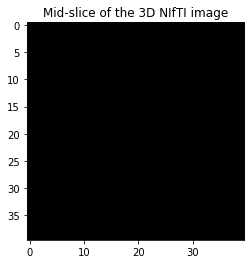

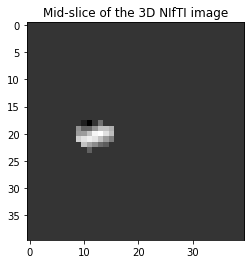

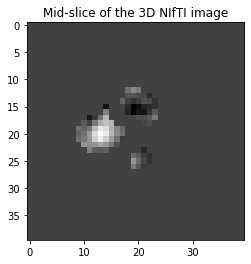

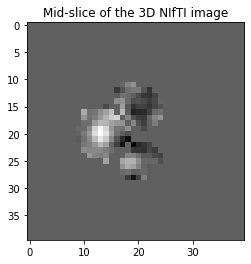

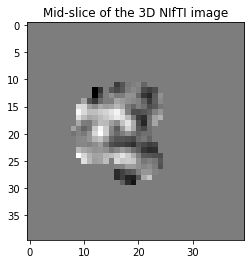

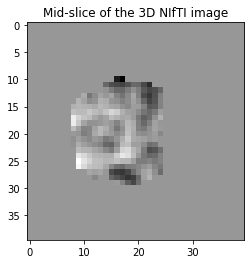

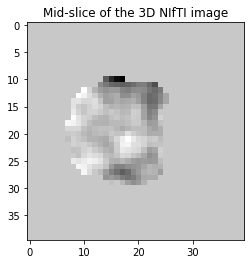

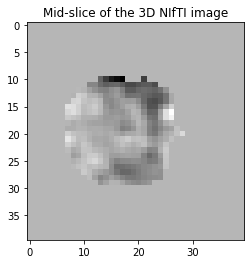

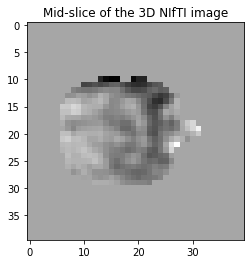

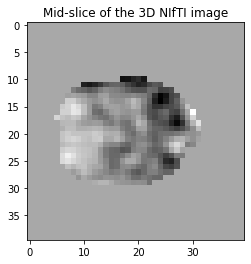

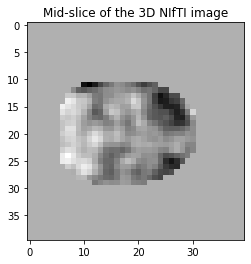

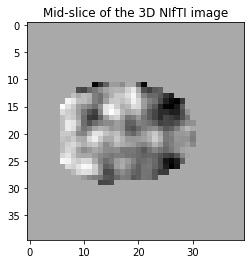

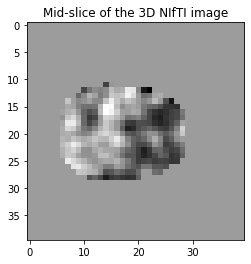

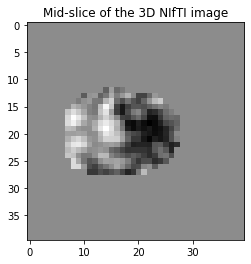

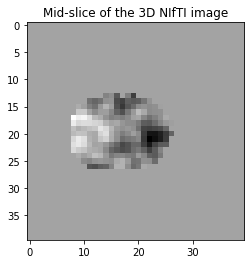

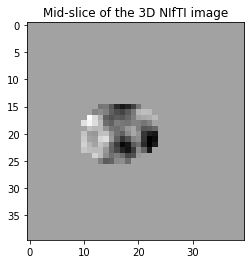

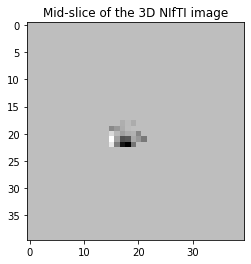

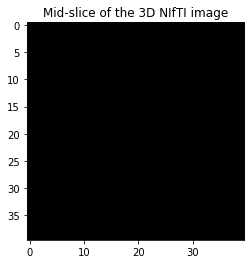

In [85]:
data = images_data_dict[images_keys[0]]
for i in range(np.shape(data)[2]):
    
    plt.imshow(data[:,:,i], cmap='gray')
    plt.title('Mid-slice of the 3D NIfTI image')
    plt.show()

In [86]:
print(images_dict[images_keys[0]])


<class 'nibabel.nifti1.Nifti1Image'>
data shape (40, 40, 18)
affine:
[[ -1.24544001   0.           0.106718    24.9144001 ]
 [ -0.05239916   1.08895004  -0.61151397 -18.20610046]
 [  0.09296852   0.61375499   1.08497    -34.30680084]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 40 40 18  1  1  1  1]
intent_p1       : 4209.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : t test
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         1.2500038  1.250003   1.2499992  0.392      0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_dur

In [71]:
data_folder = r'D:\shabnam\DESU\Projet\Data\SPMT-9_S1M1\cor'
image_paths = list(glob(f"{data_folder}/*.nii"))
file_name_table = []
for file_path in image_paths:
    normalized_path = os.path.normpath(file_path)
    file_name = os.path.splitext(os.path.basename(normalized_path))[0]
    file_name_table.append(file_name)

irmimg=[]
num_images=len(image_paths)
for i in range(num_images):
    img = nib.load(image_paths[i])
    irmimg.append(img)

mri_data_transposed=[]
images_dict = dict()
images_data_dict = dict()
for i,fn in enumerate(file_name_table):
    img = nib.load(image_paths[i])
    images_dict[fn] = img
    images_data_dict[fn] = img.get_fdata()
    mri_data_transposed.append(np.transpose(img.get_fdata(), axes=(0, 2, 1)))
    print("File name: ", fn)
    image_shape = img.shape
    print("Image shape:", image_shape)
    voxel_sizes = img.header.get_zooms()
    print("Voxel sizes (mm):", voxel_sizes)
    print("****************")

images_keys=list(images_dict.keys())
data = images_data_dict[images_keys[0]]

File name:  sub-01_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-02_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-03_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-04_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-05_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-06_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-08_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-09_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-10_P2-P1_SM-FWE
Image shape: (73, 87, 73)
Voxel sizes (mm): (2.5, 2.5, 2.5)
****************
File name:  sub-11_

In [72]:
mri_data_transposed_ = np.transpose(mri_data_transposed, axes=(1, 2, 3, 0))
np.shape(mri_data_transposed_)

(73, 73, 87, 32)

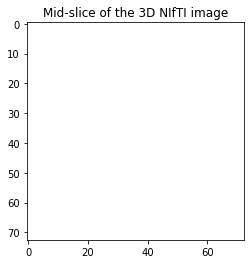

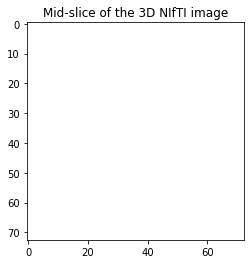

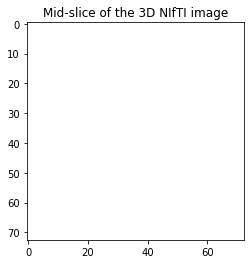

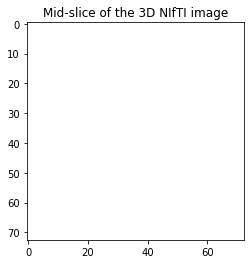

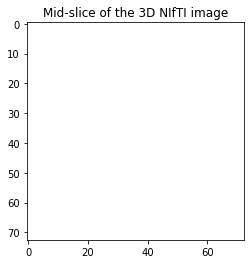

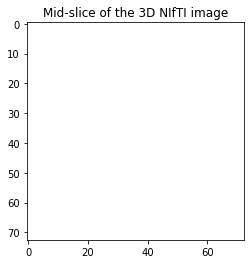

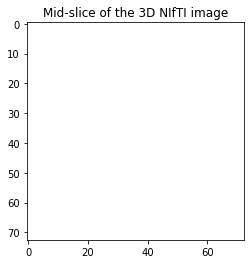

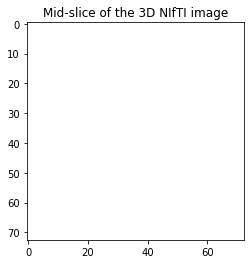

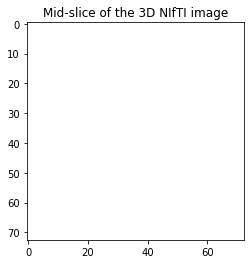

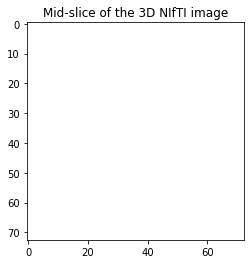

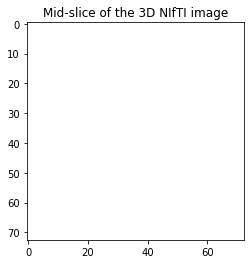

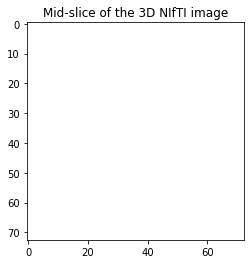

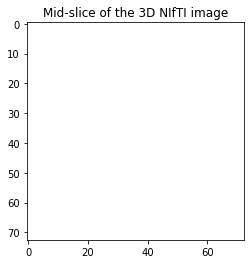

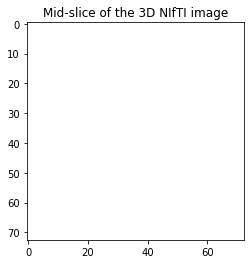

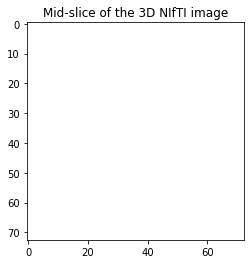

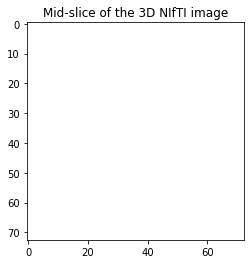

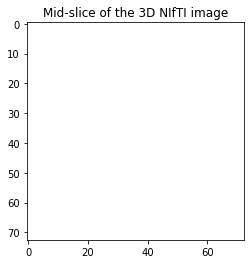

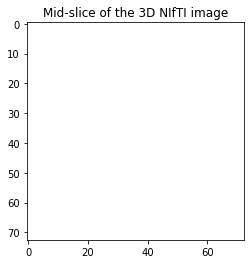

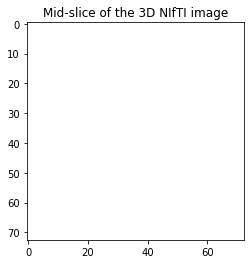

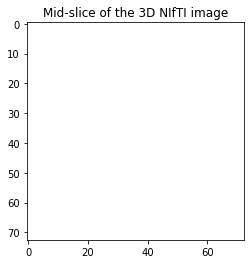

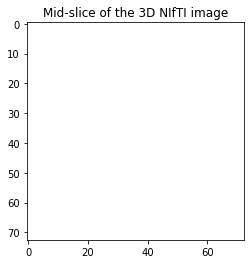

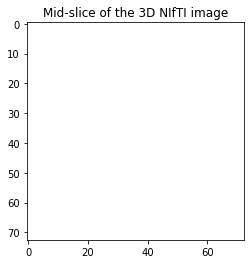

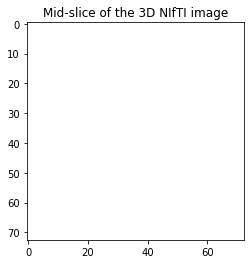

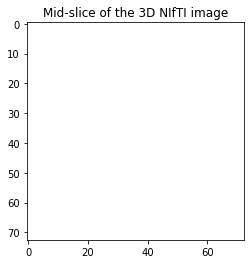

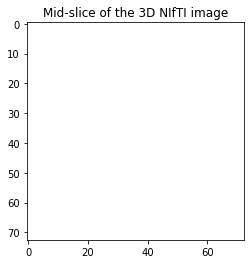

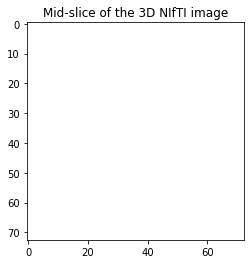

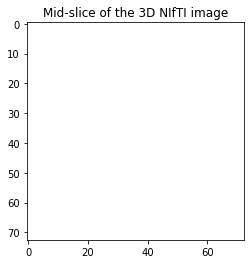

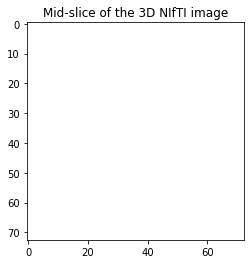

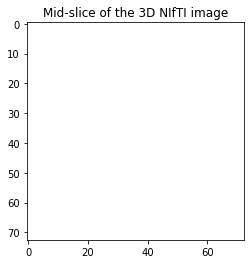

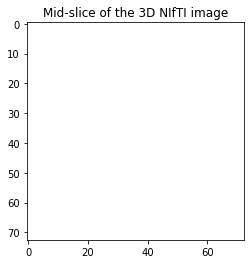

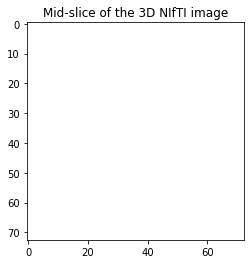

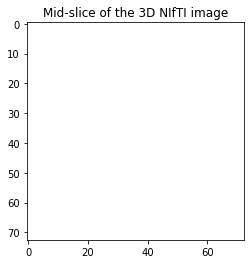

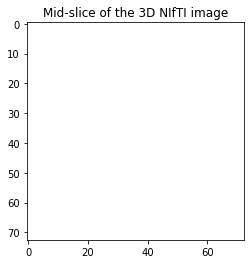

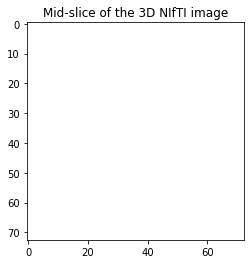

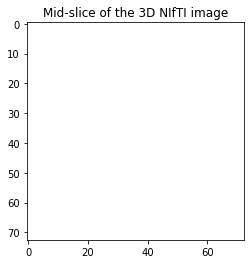

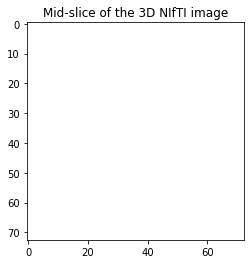

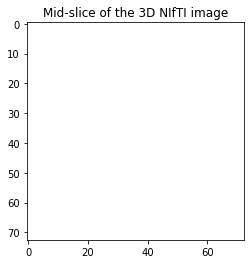

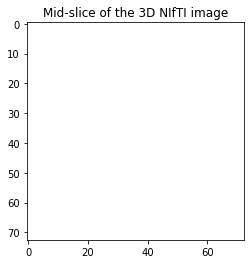

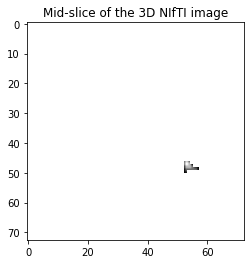

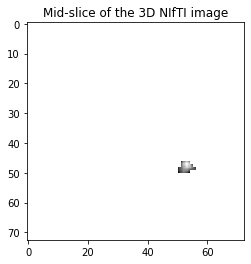

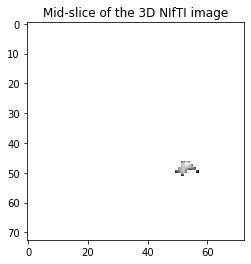

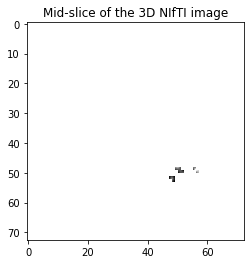

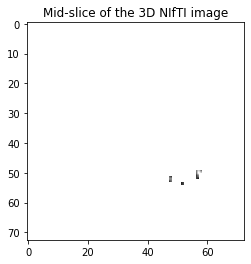

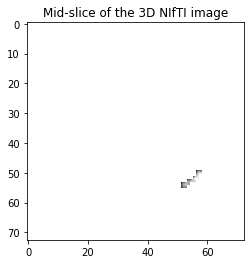

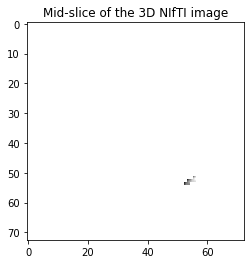

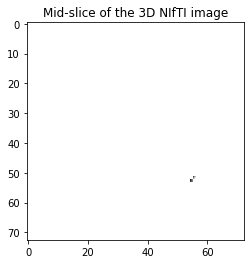

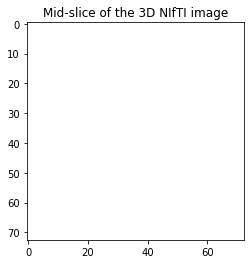

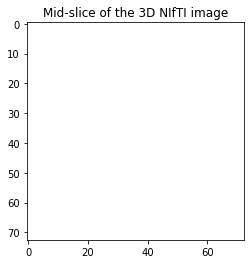

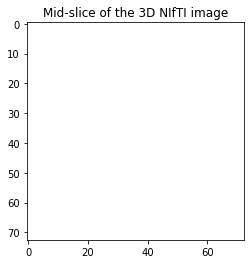

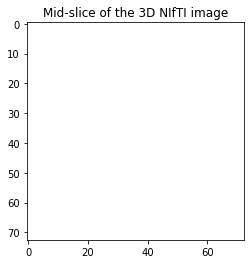

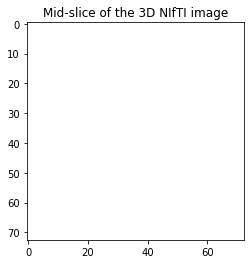

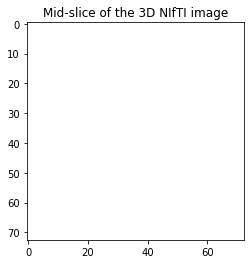

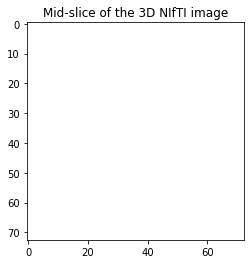

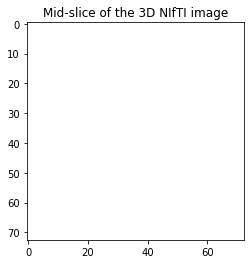

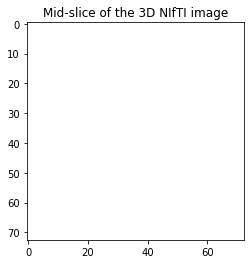

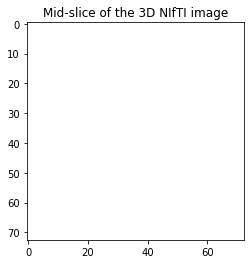

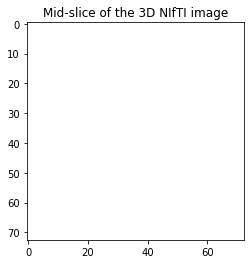

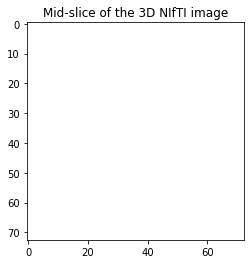

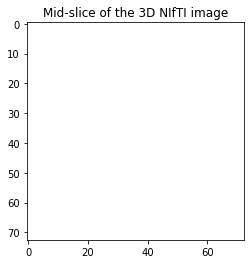

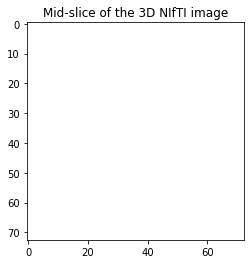

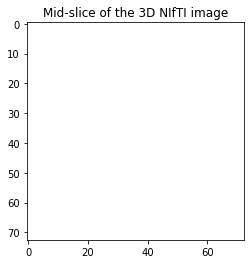

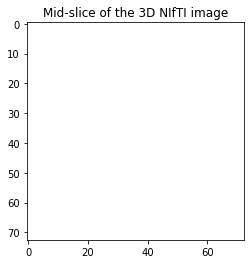

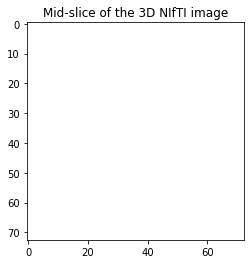

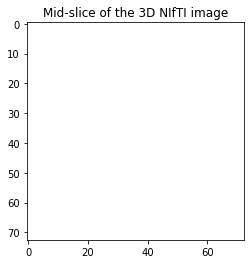

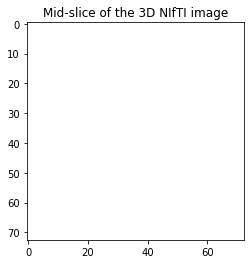

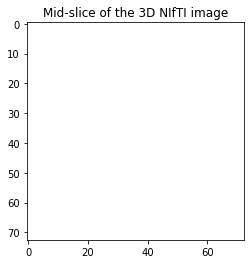

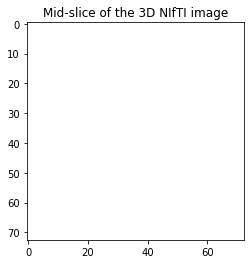

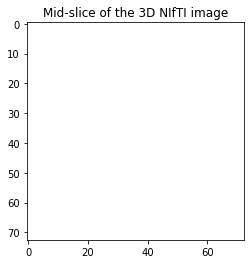

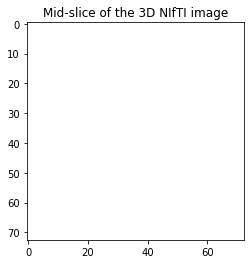

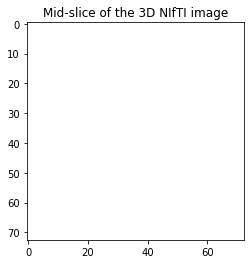

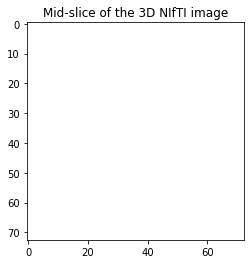

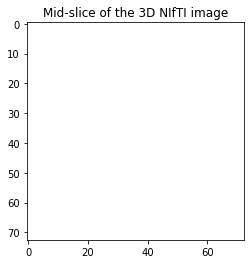

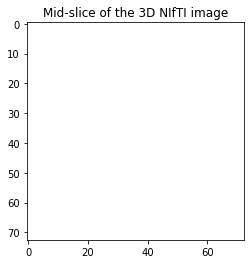

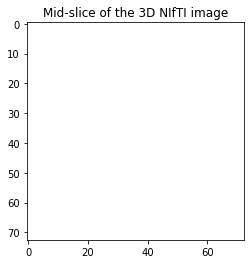

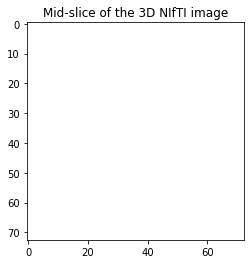

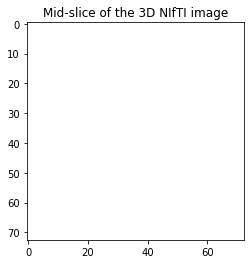

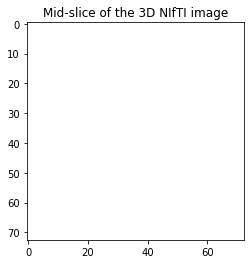

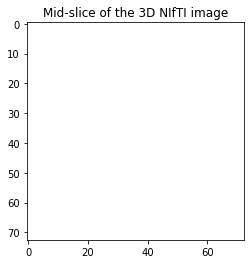

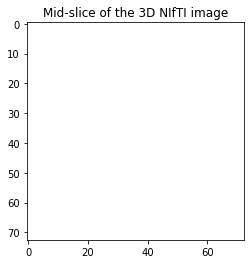

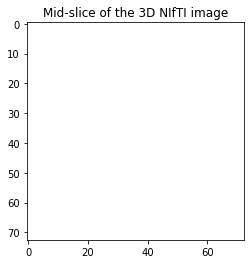

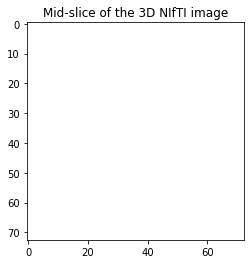

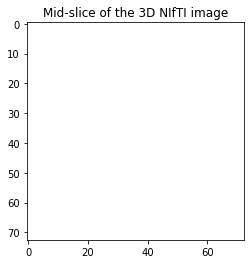

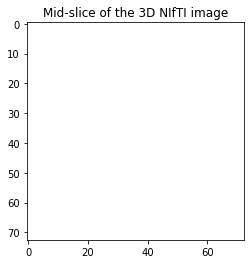

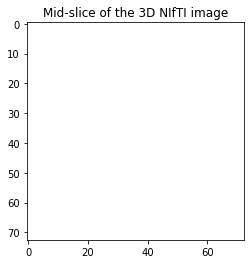

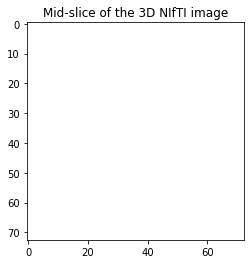

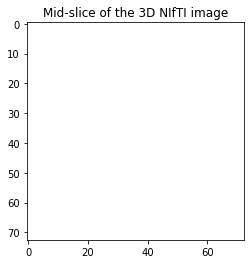

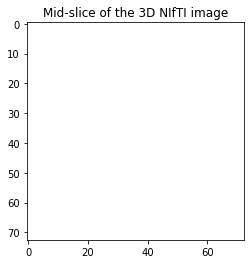

In [7]:
for i in range(np.shape(data)[1]):
    plt.imshow(data[:,i,:], cmap='gray')
    plt.title('Mid-slice of the 3D NIfTI image')
    plt.show()

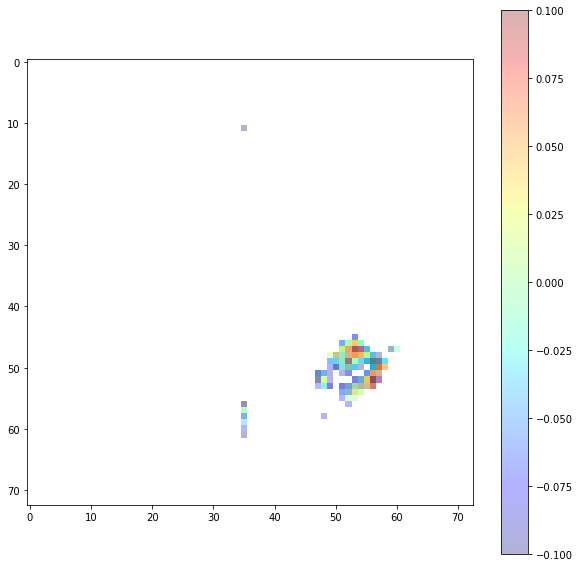

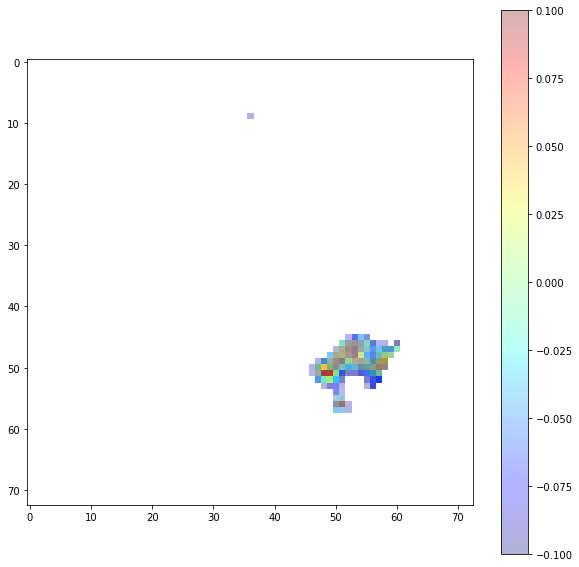

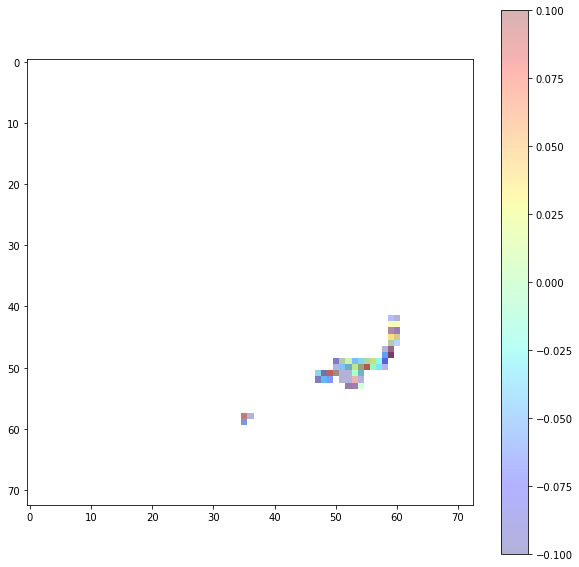

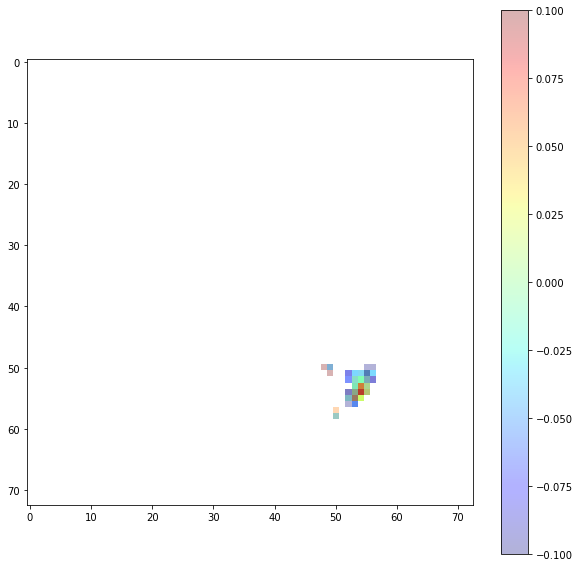

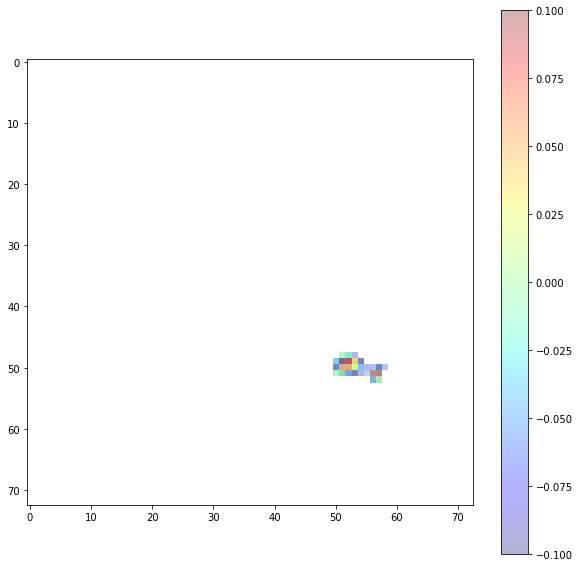

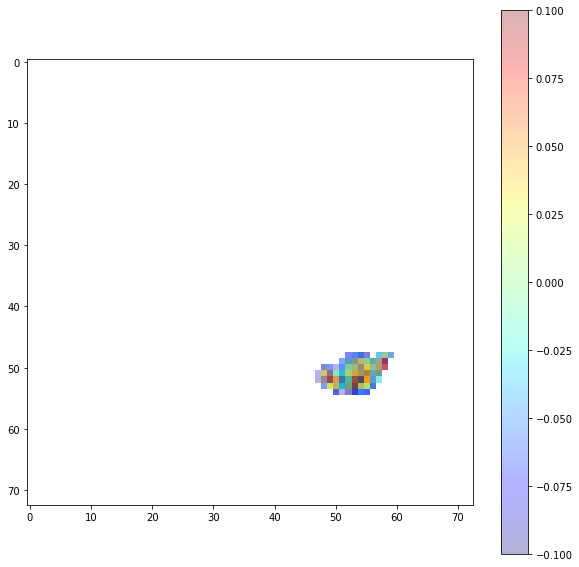

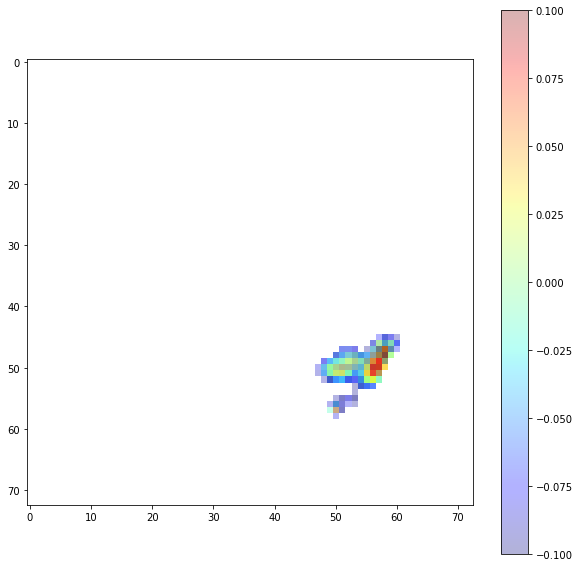

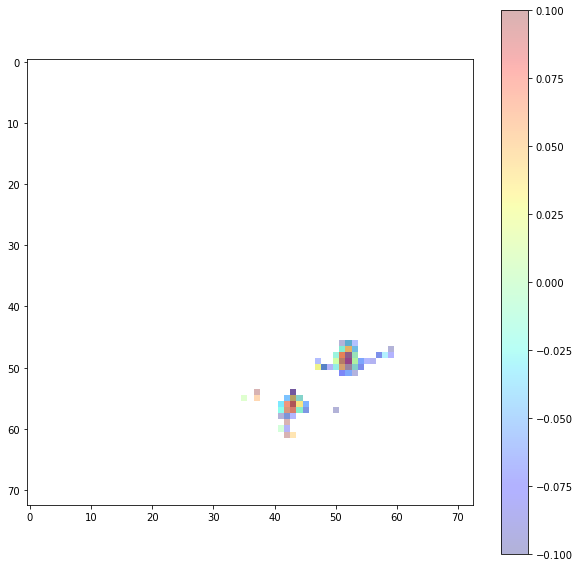

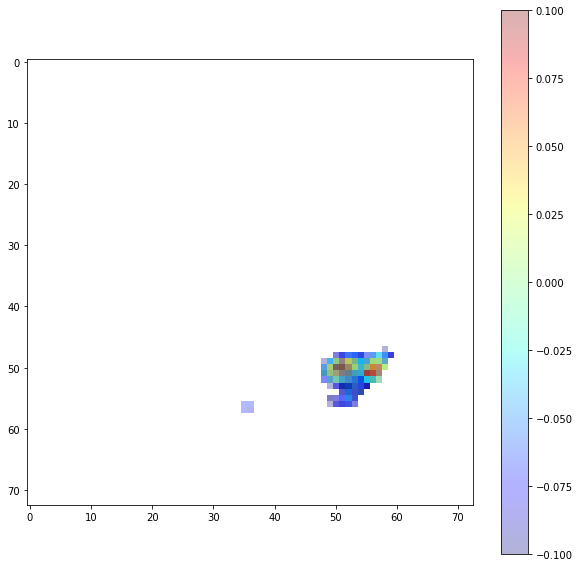

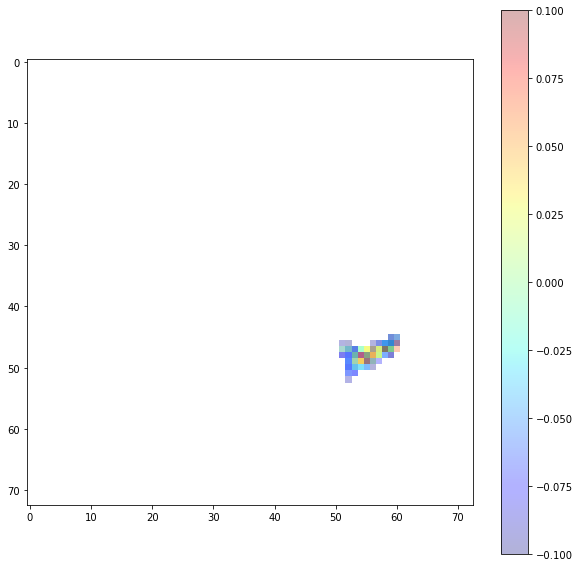

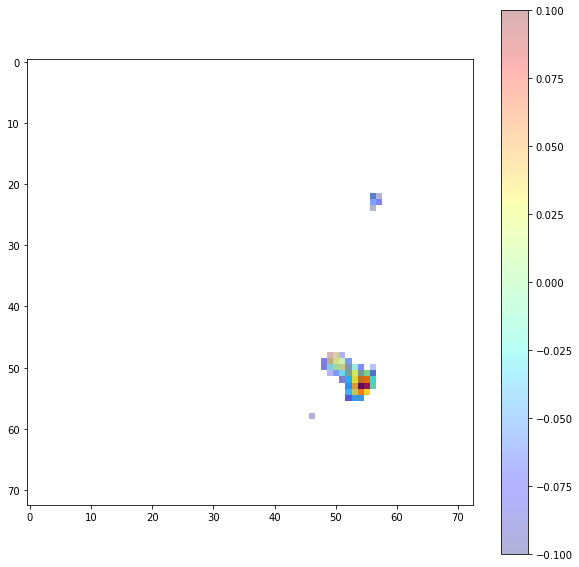

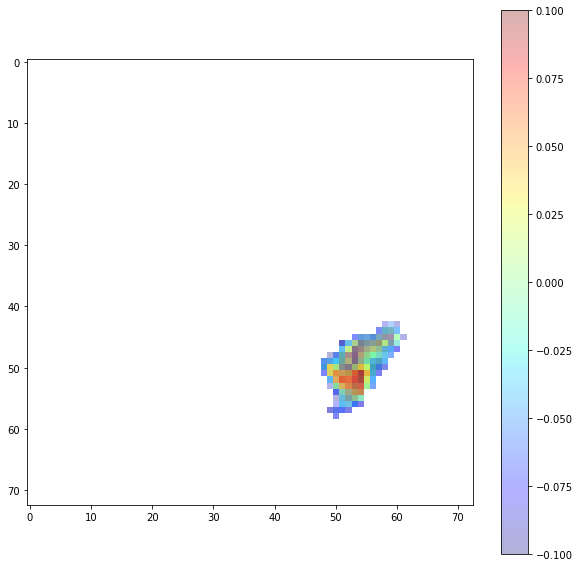

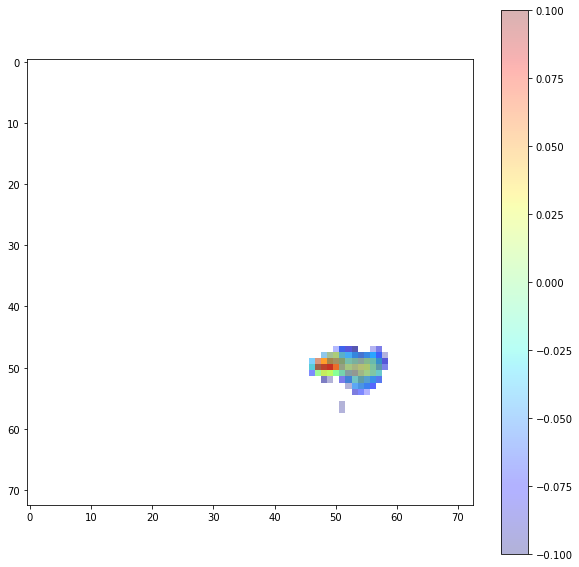

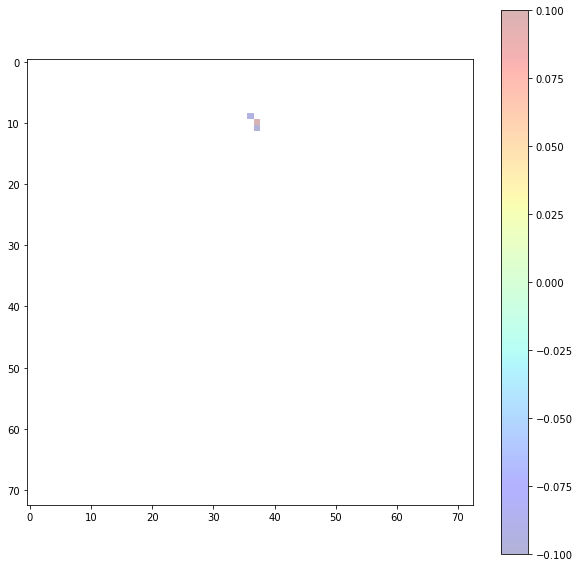

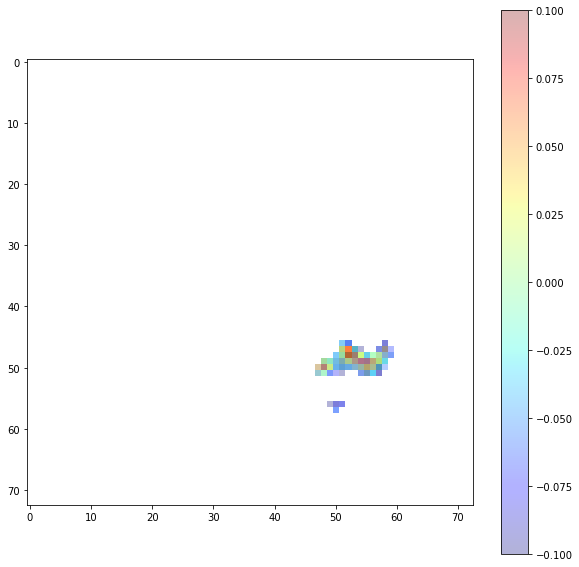

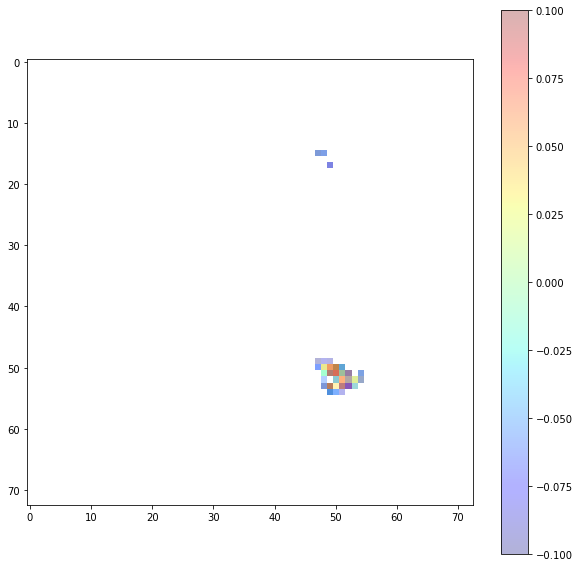

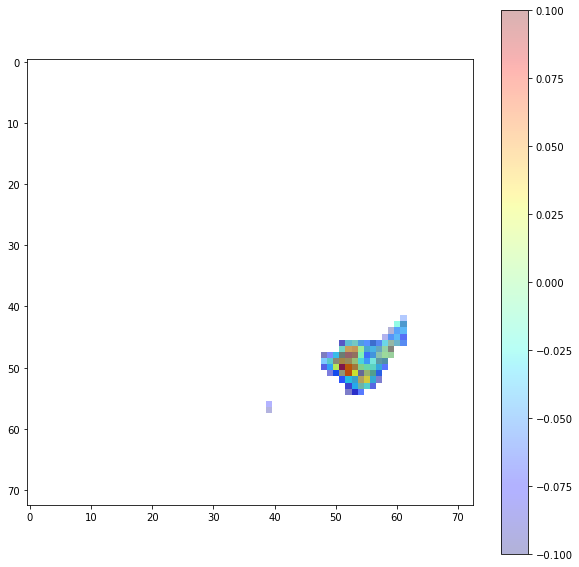

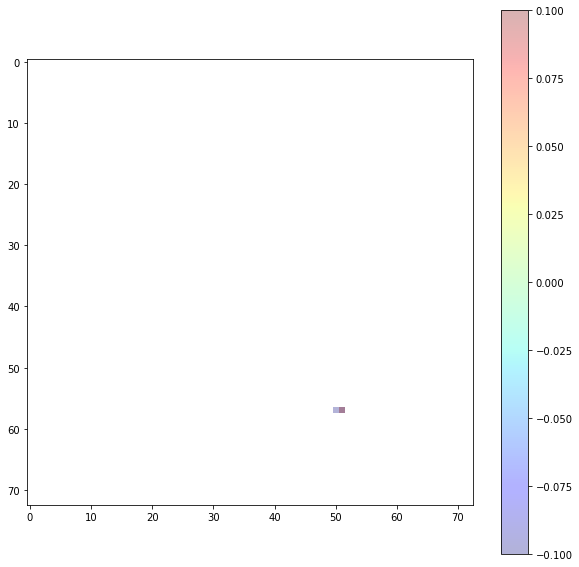

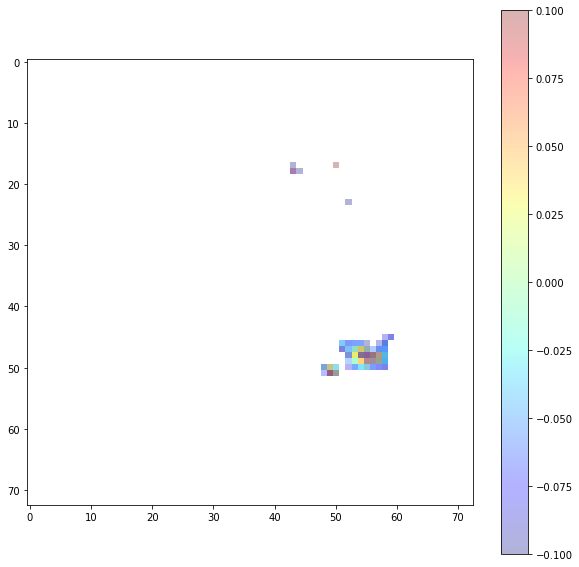

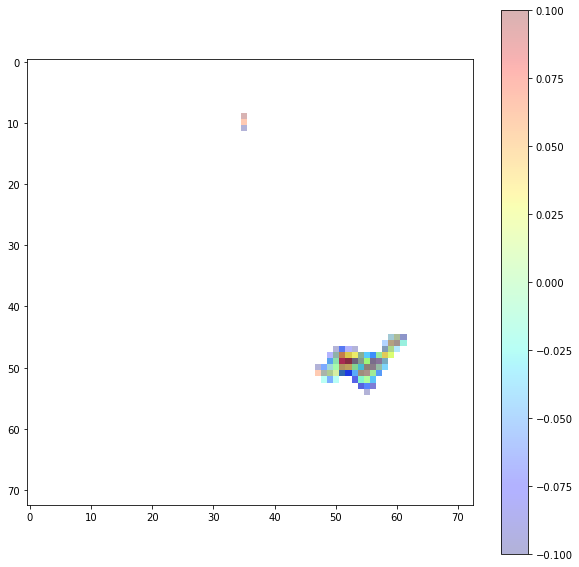

In [34]:
for k in range(20):
    data = images_data_dict[images_keys[k]]
    plt.figure(figsize=(10, 10))
    # Parcourez les 87 matrices et affichez-les dans les sous-plots
    for i in range(np.shape(data)[2]):
        plt.imshow(data[:,i,:], cmap='jet', alpha=0.3)  # Assurez-vous d'utiliser la colormap appropriée
    plt.colorbar()
    plt.axis('off')
    plt.show()

In [73]:
# RSA
import rsatoolbox
from scipy import signal
import rsatoolbox.data as rsad
from rsatoolbox.rdm import get_categorical_rdm
import rsatoolbox.data as rsad
from rsatoolbox.rdm import calc_rdm
from rsatoolbox import vis
import numpy as np
from scipy.ndimage import zoom

In [77]:
n_subjects = mri_data_transposed_.shape[0] * mri_data_transposed_.shape[1] * mri_data_transposed_.shape[2]
n_channels = np.prod(mri_data_transposed_.shape[3:])
data_reshaped = mri_data_transposed_.reshape(n_subjects, n_channels)
np.shape(data_reshaped)

(463623, 32)

In [79]:
n_subjects = np.prod(mri_data_transposed_.shape[:3])  # Total number of subjects (40*40*18)
n_channels = mri_data_transposed_.shape[3]  # Number of channels (16)

# Reshape the 4D MRI data into a 2D matrix with observations as rows and channels as columns
data_reshaped2 = np.reshape(mri_data_transposed_, (n_subjects, n_channels))
np.shape(data_reshaped2)

(463623, 32)

In [80]:
# Create a Dataset object to hold your reshaped data
dataset = rsad.Dataset(data_reshaped)

# Calculate the RDM (Representational Dissimilarity Matrix)
rdms = calc_rdm(dataset, method='correlation')

# Visualize the RDM
vis.show_rdm(rdms)

MemoryError: Unable to allocate 1.56 TiB for an array with shape (463623, 463623) and data type float64

In [74]:
dataset = rsad.Dataset(mri_data_transposed_)

AttributeError: measurements must be in dimension n_obs x n_channel

In [63]:
data = rsatoolbox.data.Dataset(masked_data)
rdms = rsatoolbox.rdm.calc_rdm(data, method='correlation')
print(rdms)

AttributeError: measurements must be in dimension n_obs x n_channel

In [44]:

np.shape(irmimg[0])


(73, 87, 73)

In [26]:
import numpy as np
from scipy.spatial.distance import squareform
from sklearn.manifold import MDS

# Step 1: Compute pairwise dissimilarities (example data, replace with your own)
# dissimilarities_subject1, dissimilarities_subject2, ..., dissimilarities_subject32

# Step 2: Create Dissimilarity Matrix
all_dissimilarities = np.vstack([
    dissimilarities_subject1,
    dissimilarities_subject2,
    # ... add all subject dissimilarities
    dissimilarities_subject32
])

# Step 3: Perform MDS for Dimensionality Reduction
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(all_dissimilarities)

# Visualization (example)
import matplotlib.pyplot as plt

# Assuming you have condition labels, replace 'condition_labels' with your actual labels
condition_labels = ["Condition1", "Condition2", ..., "ConditionN"]

plt.figure(figsize=(10, 6))
for i, subject_embedding in enumerate(np.split(embedding, 32)):
    plt.scatter(subject_embedding[:, 0], subject_embedding[:, 1], label=f"Subject {i+1}")

for i, condition_label in enumerate(condition_labels):
    plt.text(embedding[i, 0], embedding[i, 1], condition_label)

plt.legend()
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("MDS Embedding of RSA Dissimilarities")
plt.show()


NameError: name 'dissimilarities_subject1' is not defined

In [24]:

import numpy as np
import nibabel as nib
from scipy.ndimage import affine_transform

image1 = nib.load('D:/shabnam/DESU/Projet/Data/sub-01_P2-P1_SM-FWE.nii')
image2 = nib.load('D:/shabnam/DESU/Projet/Data/AAL3v1_mask_001.nii')
image2_data=image2.get_fdata()
new_matrix = np.where(image2_data > 0.8 , 1, 0)

print(image2_data)
print(new_matrix)

print(image1.shape)

# Resample one of the images to match dimensions
# Assuming image1 is the reference image
image2_data = new_matrix
image1_data=image1.get_fdata()

transform_matrix = np.array([[-2.5, 0.0, 0.0, 90.0],
                             [0.0, 2.5, 0.0, -125.0],
                             [0.0, 0.0, 2.5, -72.5],
                             [0.0, 0.0, 0.0, 1.0]])
transform_matrix=np.linalg.inv(transform_matrix)

# Calculate the affine transformation matrix
# This can be obtained from your registration method of choice
# For example, you might use rigid registration from an external library

# Apply the affine transformation to the image2 data
aligned_image2_data = affine_transform(image2_data, transform_matrix, output_shape=image1_data.shape)

# Create a new NiBabel Nifti1Image with the aligned data and affine from image1
aligned_image2 = nib.Nifti1Image(aligned_image2_data, image1.affine)


# Save the aligned image
nib.save(aligned_image2, 'D:/shabnam/DESU/Projet/Data/newmask.nii.gz')


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0 0 0 .